In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
import numpy as np
import warnings
import os

warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/earthquakes-in-indonesia/katalog_gempa.csv
/kaggle/input/earthquakes-in-indonesia/usgs.sqlite
/kaggle/input/earthquakes-in-indonesia/katalog_sensor.tsv
/kaggle/input/earthquakes-in-indonesia/katalog_gempa_v2.tsv


In [2]:
df = pd.read_csv('/kaggle/input/earthquakes-in-indonesia/katalog_gempa.csv')

In [3]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      92887 non-null  object 
 1   ot       92887 non-null  object 
 2   lat      92887 non-null  float64
 3   lon      92887 non-null  float64
 4   depth    92887 non-null  int64  
 5   mag      92887 non-null  float64
 6   remark   92887 non-null  object 
 7   strike1  2735 non-null   float64
 8   dip1     2735 non-null   float64
 9   rake1    2735 non-null   float64
 10  strike2  2735 non-null   float64
 11  dip2     2735 non-null   float64
 12  rake2    2735 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.2+ MB
None
          tgl            ot   lat     lon  depth  mag  \
0  2008/11/01  21:02:43.058 -9.18  119.06     10  4.9   
1  2008/11/01  20:58:50.248 -6.55  129.64     10  4.6   
2  2008/11/01  17:43:12.941 -7.01  106.63    121  3.7   
3  2008/11/01  16:24:14.75

In [4]:
# Ubah kolom tanggal jadi datetime
df['tgl'] = pd.to_datetime(df['tgl'], errors='coerce')

# Hapus baris dengan nilai tanggal atau magnitudo kosong
df = df.dropna(subset=['tgl', 'mag', 'lat', 'lon'])

# Buat kolom tahun dan bulan
df['year'] = df['tgl'].dt.year
df['month'] = df['tgl'].dt.month

# Cek data yang sudah dibersihkan
print(df.head())

         tgl            ot   lat     lon  depth  mag  \
0 2008-11-01  21:02:43.058 -9.18  119.06     10  4.9   
1 2008-11-01  20:58:50.248 -6.55  129.64     10  4.6   
2 2008-11-01  17:43:12.941 -7.01  106.63    121  3.7   
3 2008-11-01  16:24:14.755 -3.30  127.85     10  3.2   
4 2008-11-01  16:20:37.327 -6.41  129.54     70  4.3   

                     remark  strike1  dip1  rake1  strike2  dip2  rake2  year  \
0  Sumba Region - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  2008   
1                 Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN  2008   
2          Java - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  2008   
3         Seram - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  2008   
4                 Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN  2008   

   month  
0     11  
1     11  
2     11  
3     11  
4     11  


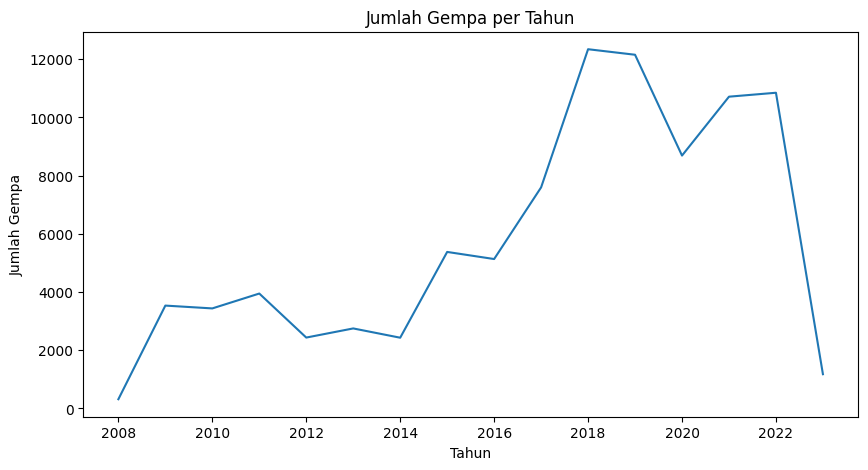

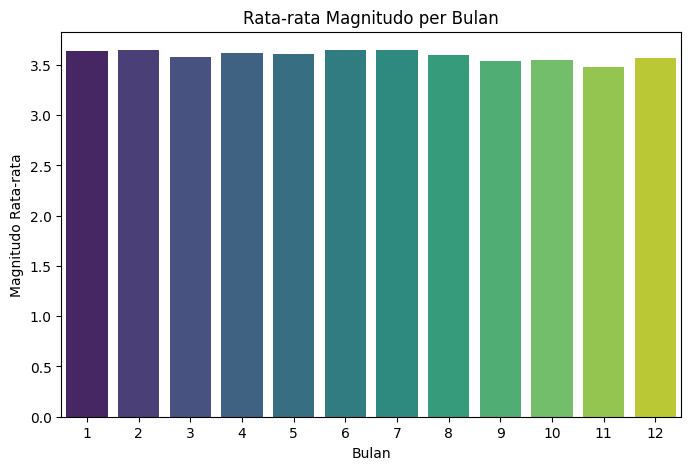

In [5]:
# Jumlah gempa per tahun
yearly_counts = df.groupby('year').size()
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Jumlah Gempa per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Gempa')
plt.show()

# Rata-rata magnitudo per bulan
monthly_mag = df.groupby('month')['mag'].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=monthly_mag.index, y=monthly_mag.values, palette='viridis')
plt.title('Rata-rata Magnitudo per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Magnitudo Rata-rata')
plt.show()

In [9]:
# Scatter map interaktif menggunakan Plotly
fig = px.scatter_mapbox(df, 
                        lat='lat', lon='lon', 
                        color='mag', size='mag',
                        hover_name='remark',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15, zoom=4,
                        mapbox_style='carto-positron',
                        title='Peta Gempa Indonesia')
fig.show()

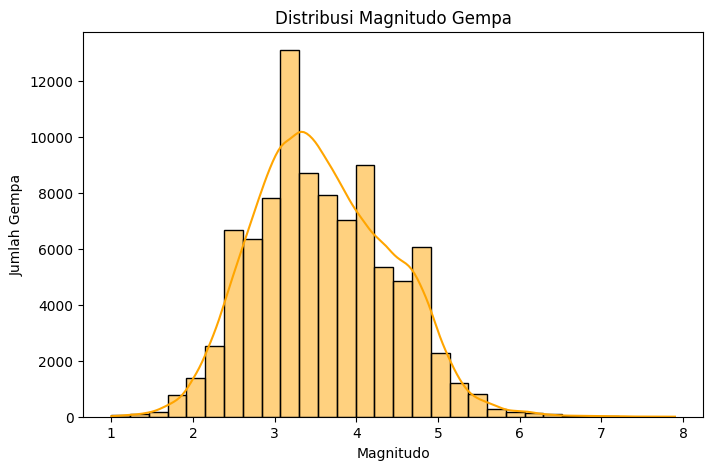

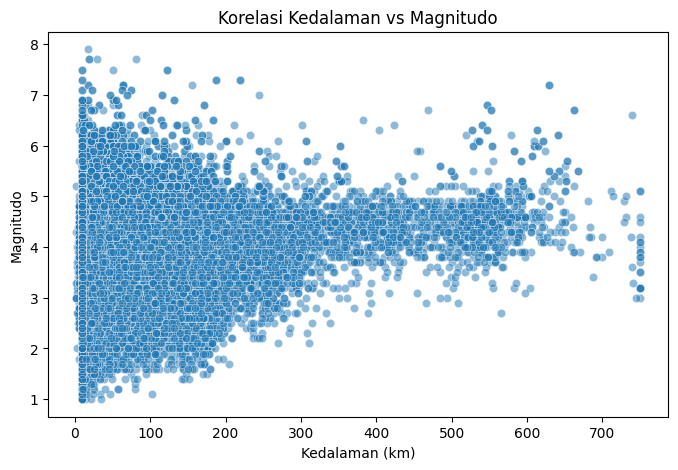

In [7]:
# Distribusi magnitudo
plt.figure(figsize=(8,5))
sns.histplot(df['mag'], bins=30, kde=True, color='orange')
plt.title('Distribusi Magnitudo Gempa')
plt.xlabel('Magnitudo')
plt.ylabel('Jumlah Gempa')
plt.show()

# Scatter kedalaman vs magnitudo
plt.figure(figsize=(8,5))
sns.scatterplot(x='depth', y='mag', data=df, alpha=0.5)
plt.title('Korelasi Kedalaman vs Magnitudo')
plt.xlabel('Kedalaman (km)')
plt.ylabel('Magnitudo')
plt.show()

In [8]:
# Ambil kolom lat, lon, mag untuk clustering
X = df[['lat','lon','mag']]

# Normalisasi data (opsional)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering, misal 5 cluster
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Peta cluster
fig = px.scatter_mapbox(df, 
                        lat='lat', lon='lon',
                        color='cluster',
                        size='mag',
                        hover_name='remark',
                        color_continuous_scale=px.colors.qualitative.Set1,
                        size_max=15, zoom=4,
                        mapbox_style='carto-positron',
                        title='Cluster Wilayah Rawan Gempa')
fig.show()